In [4]:
#k-평균
#평균값을 자동으로 찾아준다. -> 평균값이 클러스터의 중심에 위치해 클러스터 중심 또는 센트로이드

#작동방식
#무작위로 k개의 클러스터 중심을 정한다.
#각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정
#클러스터에 속한 샘플의 평균값으로 클러스터의 중심 변경
#클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복

In [5]:
# !wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np
fruits = np.load('../fruits_300.npy')
print(fruits.shape)
print(fruits[:2])

fruits_2d = fruits.reshape(-1, 100*100) #(샘플 개수, 너비X높이) -> 크기를 가진 2차원 배열
print(fruits_2d.shape)
print(fruits_2d[:2])

(300, 100, 100)
[[[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]]
(300, 10000)
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
(array([0, 1, 2], dtype=int32), array([112,  98,  90]))


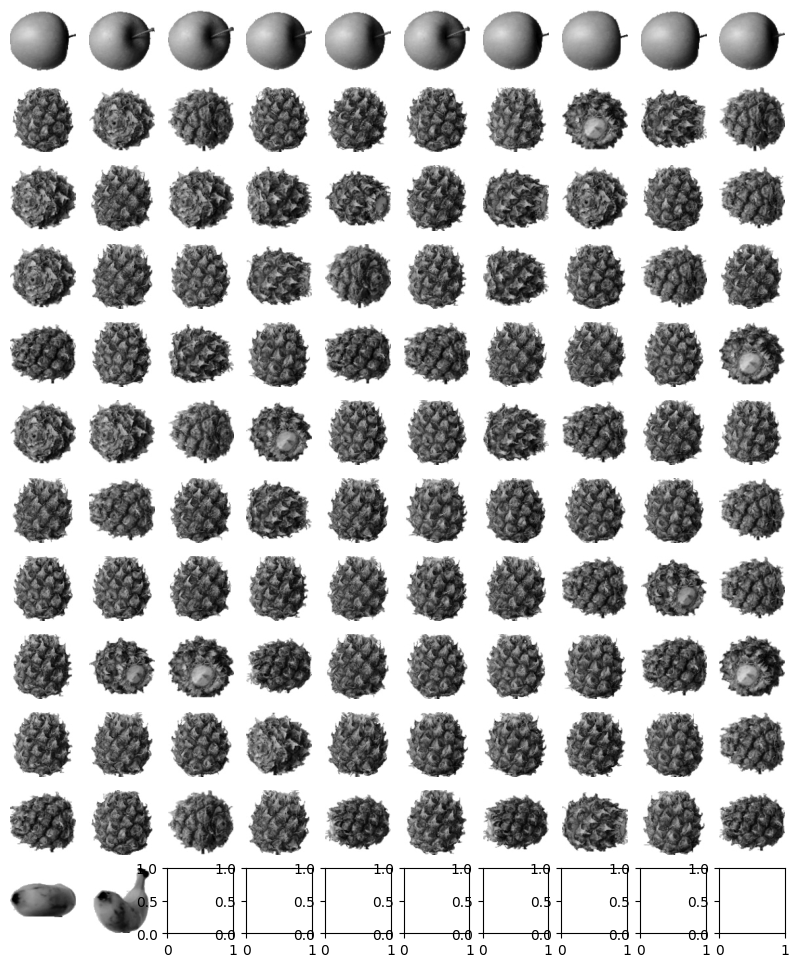

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)
print(km.labels_) # 군집된 결과 저장됨
print(np.unique(km.labels_, return_counts=True))

def draw_fruits(arr, ratio=1):
  n = len(arr) #샘플의 개수
  rows = int(np.ceil(n/10)) #ceil 올림 / 한 줄에 10개씩 이미지를 그린다. 샘플 개수를 10으로 나누어 전체 행 개수 계산
  cols = n if rows < 2 else 10 #행이 1개이면 열의 개수는 샘플의 개수, 그렇지 않으면 10개

  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False) #squeeze=False: (10,1) -> (10,)되는 것을 방지
  
  for i in range(rows):
    for j in range(cols):
      if i * 10 + j < n:  #n개까지만 그린다.
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
        axs[i, j].axis('off')
  plt.show

draw_fruits(fruits[km.labels_==0])

[[3400.24197319 8837.37750892 5279.33763699]]
[0]
4
(300, 10000)
[1 1 1 ... 1 1 1]


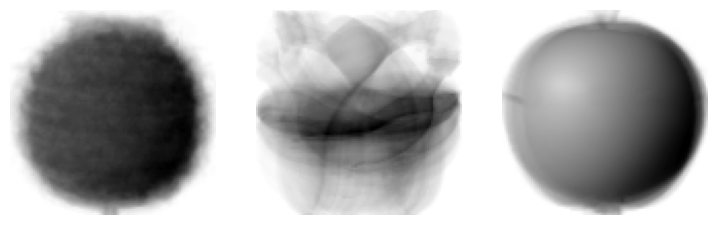

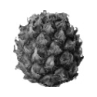

In [7]:
#클러스터 중심
#센트로이드 값이 cluster_centers_에 저장되어있다.
#이미지로 출력하려면 100X100 크기의 2차원 배열로 바꿔야 한다.
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

print(km.transform(fruits_2d[100:101])) 
#슬라이싱 연산자를 사용해 (1, 10000) 크기의 배열 전달 / fit() 메서드와 마찬가지로 2차원 배열
#(1, 클러스터 개수)

#가장 가까운 클러스터 중심을 예측 클래스로 출력 -> predict()
print(km.predict(fruits_2d[100:101]))
draw_fruits(fruits[100:101])
print(km.n_iter_)

print(fruits_2d.shape)
print(fruits_2d[100])

<function matplotlib.pyplot.show(close=None, block=None)>

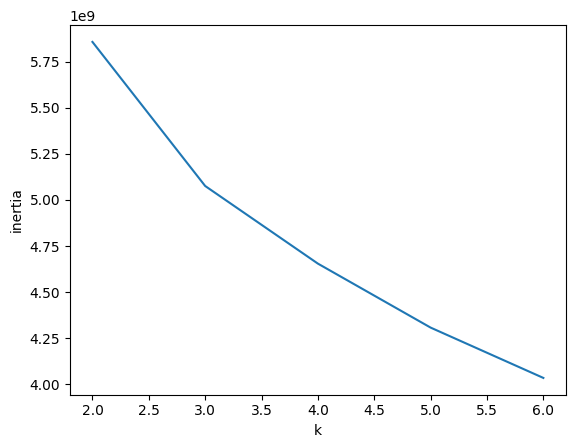

In [8]:
# 실전에서는 몇 개의 클러스터가 있는지 알 수 없다. -> 적절한 갯수 찾는 법
# 완벽한 방법은 없다 => 적절한 클러스터 개수 찾기 대표적인 방법 => 엘보우 방법
# 클러스터 중심과 클러스터에 속한 샘플 사이의 거리를 잴 수 있다. => 거리의 제곱의 합 = 이너셔: 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지를 나타내는 값
# 클러스터가 늘어나면 이너셔도 줄어든다.
# 엘보우 방법은 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰해 최적의 클러스터 개수를 찾는 방법
# 감소하는 속도가 꺾이는 지점 -> 클러스터 개수를 늘려도 잘 밀집된 정도가 개선되지 않는다. = 이너셔가 줄어들지 않는다.

#KMeans는 inertia를 자동으로 계산해서 제공한다.
inertia = []

for k in range(2, 7):
  km = KMeans(n_clusters=k, init='k-means++', random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)

plt.plot(range(2,7), inertia)
plt.xlabel("k")
plt.ylabel("inertia")
plt.show